# Hausaufgabe 5 

## Integration einer Bewegungsgleichung: Freier Fall - Wiederholung

In dieser Aufgabe werden wir erneut die Bewegungsgleichung des freien Falls numerisch mit dem Euler Verfahren lösen. Die Bewegungsgleichung hat die Form:
\begin{equation}\tag{1}
 \ddot x = \frac{\mathrm{d}^2x}{\mathrm{d}t^2}= a
\end{equation}

Dieses Mal soll die Bewegungsgleichung nicht "per Hand" sondern rekursiv mittels einer Schleife gelöst werden. 

## 1. Integration mit Schleife

**a)** Lösen Sie erneut Gleichung (1) für fünf Zeitschritte $\Delta t = 0.1$, indem Sie die Gleichungen (3) und (4) für die Anfangswerte $x_0=x\left(t=0\right) = 2$ und $v_0=v\left(t=0\right) = 1$ numerisch mit Hilfe einer Schleife integrieren. Dabei soll $a=-9.81$ sein. Speichern Sie die numerisch berechneten Positionen in einer Liste indem Sie `append()` benutzen.

Als Erinerrung:

\begin{equation} \tag{2}
x\!\left( t \right) = x_0 + v_0 t + \frac{1}{2} a t^2.
\end{equation}

\begin{align}\tag{3}
        x\left(t+\Delta t \right) &= x\left(t\right) + v\left(t\right) \Delta t \\ 
        v\left(t+\Delta t \right) &= v\left(t\right) + a\Delta t \tag{4}
    \end{align}
    


In [12]:
import numpy as np
def numIntegr(x, v, dt, i): # Funktion für die numerische Integration, Parameter: x0, v0, dt, Anz. d Integrationsschritte i
    xt = [(x)] # Liste für die Bahnkurvenpunkte mit Startwert x0
    for i in range(0,i): # Berechnung der nächsten vier Punkte
        x = x + v * dt # Gleichung 3
        v = v + -9.81 * dt # Gleichung 4
        xt.append(x)
    return xt # Rueckgabewert der Funktion: Liste der Bahnkurvenpunkte
print(numIntegr(2,1,0.1,4))

[2, 2.1, 2.1019, 2.0057, 1.8114]


**b)** Plotten Sie diese Positionen in einem Diagramm mit der Bahnkurve (Gleichung (2)). Benutzen Sie das mit `ax.scatter()` erweiterte Grundgerüst von `helpPlotScatter.ipynb`. 

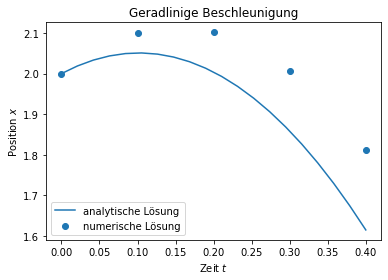

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Anfangsbedingungen
x0 = 2
v0 = 1
a = -9.81
dt = 0.1

t = np.linspace(0, 4*dt, 20)
xAnalytic = x0 + v0 * t + 0.5 * a * t**2

xNumeric = numIntegr(x0,v0,dt,4)
tNumeric = np.linspace(0,4*dt,5) 

fig, ax = plt.subplots()

ax.set_title("Geradlinige Beschleunigung")  # Titel
ax.plot(t, xAnalytic, label='analytische Lösung')  # x-Wert, hier x, y Wert hier xQuadrat
ax.scatter(tNumeric, xNumeric, label='numerische Lösung')
ax.set_xlabel("Zeit $t$")
ax.set_ylabel("Position $x$")

plt.legend(loc=3)
plt.show()

## 2. Variation des Zeitschrittes

Sie sollten nun die Abbildung aus Hausaufgabe 3 reproduziert haben.

**a)** Wiederholen Sie Aufgabe 1 mit einem Zeitschritt $\Delta t = 0.005$. Achten Sie darauf, dass die Integrationszeit gleich bleibt! Da Sie nun sehr viele Werte erzeugt haben, ist es sinnvoller die numerische Lösung ebenfalls in einem Linienplot mit `ax.plot()` darzustellen.

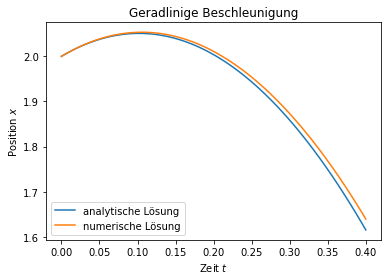

In [27]:
# Anfangsbedingungen
x0 = 2
v0 = 1
a = -9.81
dt = 0.005

t = np.linspace(0, 80*dt, 80)
xAnalytic = x0 + v0 * t + 0.5 * a * t**2

xNumeric = numIntegr(x0,v0,dt,79)
tNumeric = np.linspace(0,80*dt,80) 

fig, ax = plt.subplots()

ax.set_title("Geradlinige Beschleunigung")  # Titel
ax.plot(t, xAnalytic, label='analytische Lösung')  # x-Wert, hier x, y Wert hier xQuadrat
ax.plot(tNumeric, xNumeric, label='numerische Lösung')
ax.set_xlabel("Zeit $t$")
ax.set_ylabel("Position $x$")

plt.legend(loc=3)
plt.show()

**b)** Berechnen Sie die quadratische Abweichung $\mathrm{SE}\left(t\right)$ zwischen der numerischen und analytischen Lösung abhängig vom Zeitschritt:
   $$ 
   \mathrm{SE}\left(t\right) = \left(x_{\mathrm{numerisch}}\left(t\right) - x_\mathrm{analytisch}\left(t\right)\right) ^2 \, .
   $$
Plotten Sie die quadratische Abweichung gegen die Zeit. Benutzen Sie geeignete Beschriftungen! 

Beschreiben Sie kurz, was Sie beobachten. 

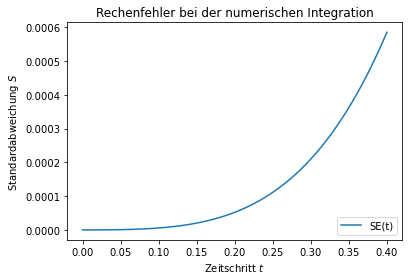

In [31]:
se = []
for i in range(0,80):
    se.append((xNumeric[i]-xAnalytic[i])**2)

t = np.linspace(0, 80*dt, 80)
    
fig, ax = plt.subplots()

ax.set_title("Rechenfehler bei der numerischen Integration")  # Titel
ax.plot(t, se, label='SE(t)')
ax.set_xlabel("Zeitschritt $t$")
ax.set_ylabel("Standardabweichung $S$")

plt.legend(loc=4)
plt.show()